In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns

titanic_data = pd.read_csv('train.csv')

C:\Users\TTM\AppData\Local\Temp\ipykernel_2336\63370257.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def plot_cf(y_true, y_pred, title):

    cf = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cf, index=['Not Survived', 'Survived'],  columns=[
                         'Not Survived', 'Survived'])
    plt.figure(figsize=(4, 4))
    plt.title(f'{title} Confusion')
    sns.heatmap(df_cm, annot=True, cmap='Blues', cbar=False, fmt=".1f")
    

In [3]:
def plot_roc_curve(true_y, y_prob, title):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr, color='darkorange', lw=2,)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

    plt.title(title)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

## پیش پردازش


In [4]:
label_encoder = LabelEncoder()

titanic_data.fillna(titanic_data.median(numeric_only=True), inplace=True)

titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_encoder.fit_transform(
    titanic_data['Embarked'])
titanic_data['Pclass'] = label_encoder.fit_transform(titanic_data['Pclass'])


X = titanic_data.drop(
    columns=['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'])
y = titanic_data['Survived']

In [5]:
X_selected = titanic_data[['Pclass', 'Sex', 'Parch', 'Embarked', 'SibSp']]

In [6]:
# مقابله با عدم تعادل کلاس ها
smote = SMOTE(random_state=42)
X_sampled, y_sampled = smote.fit_resample(X_selected, y)

In [7]:
# استانداردسازی ویژگی ها
scaler = StandardScaler()
scaler.fit(X_sampled)
X_sampled = scaler.transform(X_sampled)
y_sampled = y_sampled.to_numpy()

## تقسیم داده ها


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sampled, y_sampled, test_size=0.2, random_state=22)

print(X_selected.shape, X_train.shape, X_test.shape)

(891, 5) (878, 5) (220, 5)


## svm خطی

In [9]:
svm_model = svm.SVC()
k=5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(svm_model, X_train, y_train, cv=k, scoring='accuracy')

# Print the results
print(f"Cross-Validation Scores: {scores}")
print(f"Mean Accuracy: {scores.mean():.4f}")
print(f"Standard Deviation: {scores.std():.4f}")

Cross-Validation Scores: [0.78977273 0.76704545 0.78977273 0.78857143 0.78857143]
Mean Accuracy: 0.7847
Standard Deviation: 0.0089


In [10]:
y_test_pred = cross_val_predict(svm_model, X_test, y_test, cv=k)

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       115
           1       0.81      0.71      0.76       105

    accuracy                           0.78       220
   macro avg       0.79      0.78      0.78       220
weighted avg       0.78      0.78      0.78       220



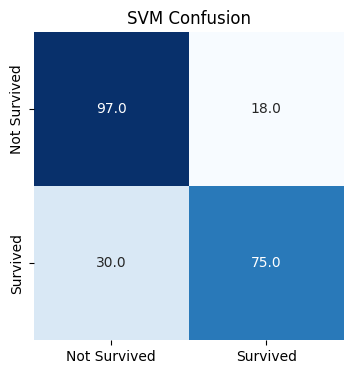

In [11]:
plot_cf(y_test, y_test_pred, 'SVM')

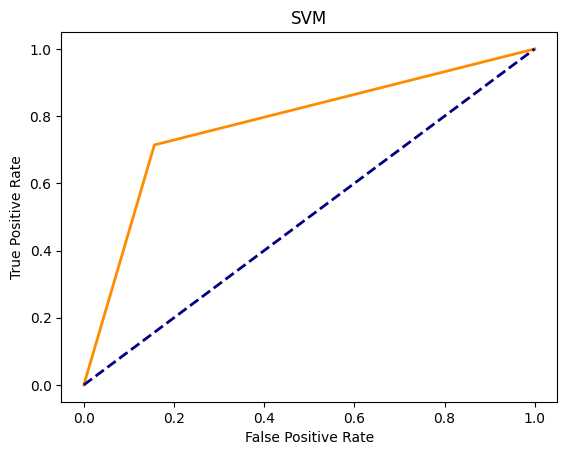

In [12]:
plot_roc_curve(y_test, y_test_pred, 'SVM')

## svm غیرخطی

In [13]:
non_svm_model = svm.SVC(kernel='rbf')
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(non_svm_model, X_train, y_train, cv=k, scoring='accuracy')

# Print the results
print(f"Cross-Validation Scores: {scores}")
print(f"Mean Accuracy: {scores.mean():.4f}")
print(f"Standard Deviation: {scores.std():.4f}")

Cross-Validation Scores: [0.78977273 0.76704545 0.78977273 0.78857143 0.78857143]
Mean Accuracy: 0.7847
Standard Deviation: 0.0089


In [14]:
y_test_pred = cross_val_predict(non_svm_model, X_test, y_test, cv=k)

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       115
           1       0.81      0.71      0.76       105

    accuracy                           0.78       220
   macro avg       0.79      0.78      0.78       220
weighted avg       0.78      0.78      0.78       220



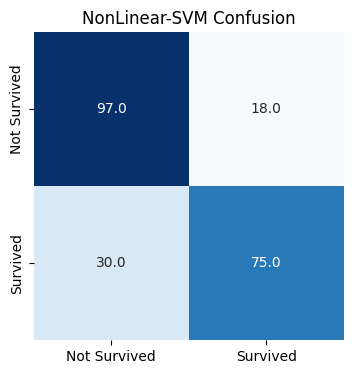

In [15]:
plot_cf(y_test, y_test_pred, 'NonLinear-SVM')

In [16]:
plot_roc_curve(y_test, y_test_pred, 'NonLinear-SVM')

## لوجستیک

In [17]:
log_model = LogisticRegression(max_iter=200)

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(log_model, X_train, y_train, cv=k, scoring='accuracy')

# Print the results
print(f"Cross-Validation Scores: {scores}")
print(f"Mean Accuracy: {scores.mean():.4f}")
print(f"Standard Deviation: {scores.std():.4f}")

Cross-Validation Scores: [0.72159091 0.77272727 0.77272727 0.76       0.78285714]
Mean Accuracy: 0.7620
Standard Deviation: 0.0215


In [18]:
y_test_pred = cross_val_predict(log_model, X_test, y_test, cv=k)

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       115
           1       0.79      0.76      0.78       105

    accuracy                           0.79       220
   macro avg       0.79      0.79      0.79       220
weighted avg       0.79      0.79      0.79       220



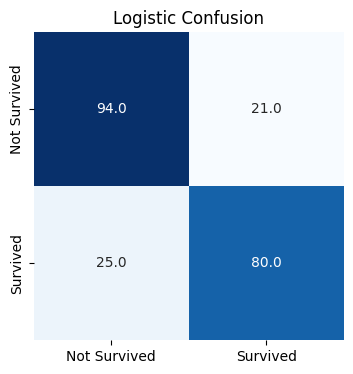

In [19]:
plot_cf(y_test, y_test_pred, 'Logistic')

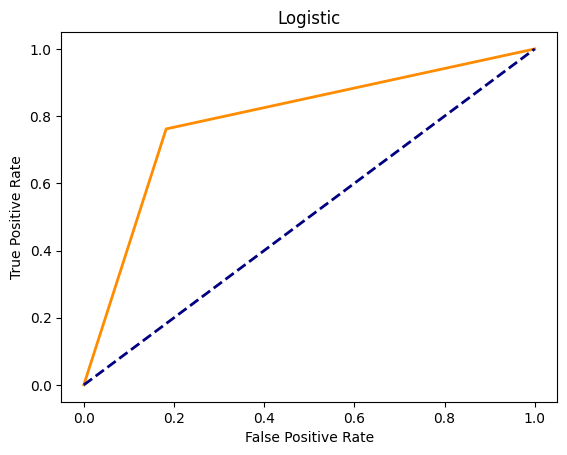

In [20]:
plot_roc_curve(y_test, y_test_pred, 'Logistic')

## آدابوست

In [21]:
ada_model = AdaBoostClassifier(
    n_estimators=100, algorithm="SAMME", random_state=0)

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(ada_model, X_train, y_train, cv=k, scoring='accuracy')

# Print the results
print(f"Cross-Validation Scores: {scores}")
print(f"Mean Accuracy: {scores.mean():.4f}")
print(f"Standard Deviation: {scores.std():.4f}")

Cross-Validation Scores: [0.75568182 0.75568182 0.77272727 0.75428571 0.78285714]
Mean Accuracy: 0.7642
Standard Deviation: 0.0115


In [22]:
y_test_pred = cross_val_predict(ada_model, X_test, y_test, cv=k)

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79       115
           1       0.76      0.77      0.77       105

    accuracy                           0.78       220
   macro avg       0.78      0.78      0.78       220
weighted avg       0.78      0.78      0.78       220



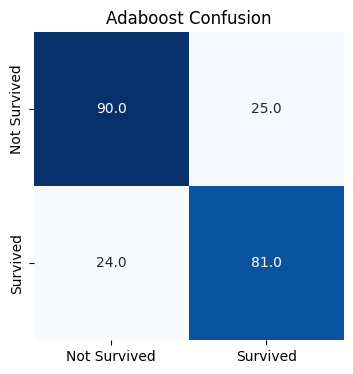

In [23]:
plot_cf(y_test, y_test_pred, 'Adaboost')

In [24]:
plot_roc_curve(y_test, y_test_pred, 'AdaBoost')